<h1>Аналитика в авиакомпании<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1">Введение</a></span></li><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-2">Изучение общей информации</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3">Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Модели-самолетов-и-количество-рейсов" data-toc-modified-id="Модели-самолетов-и-количество-рейсов-3.1">Модели самолетов и количество рейсов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.1">Вывод</a></span></li></ul></li><li><span><a href="#Города-и-количество-рейсов" data-toc-modified-id="Города-и-количество-рейсов-3.2">Города и количество рейсов</a></span></li><li><span><a href="#Топ-10-городов-и-количество-рейсов" data-toc-modified-id="Топ-10-городов-и-количество-рейсов-3.3">Топ-10 городов и количество рейсов</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4">Общий вывод</a></span></li></ul></div>

## Введение

«F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Необходимо понять предпочтения пользователей, покупающих билеты на те или иные направления.

**Цель** исследования: изучить базу данных и проанализировать спрос пассажиров.

В ходе исследования перед нами стоят следующие **вопросы**:  
- изучить данные в датасетах, полученных на этапе работы с базой данных;  
- проверить типы данных на корректность;  
- выбрать топ-10 городов по количеству рейсов;  
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;  
- сделать выводы по каждому из графиков, пояснить результат.  

Исследование включает в себя следующие **этапы**:  
1. Изучение общей информации.
2. Анализ данных.
3. Общий вывод.


**Описание данных**  
*/datasets/query_1.csv* содержит следующую информацию:  
  model — модель самолета  
  flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года.    
  
*/datasets/query_3.csv* содержит следующую информацию:  
city — город    
average_flights — среднее количество рейсов, прибывающих в город city за день в августе 2018 года  


## Изучение общей информации

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 10

In [2]:
df_aircraft = pd.read_csv('/datasets/query_1.csv')

In [3]:
df_aircraft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
df_aircraft

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Данные предобработки не требуют.

In [5]:
df_city = pd.read_csv('/datasets/query_3.csv')

In [6]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [7]:
df_city.head()

,city,average_flights
0,Абакан,3.87
1,Анадырь,1.00
2,Анапа,2.16
3,Архангельск,5.35
4,Астрахань,2.45


In [8]:
df_city.describe()

,average_flights
count,101.00
mean,5.49
std,13.12
min,1.00
25%,2.00
50%,3.00
75%,5.87
max,129.77


Данные предобработки не требуют.

## Анализ данных

### Модели самолетов и количество рейсов

In [9]:
df_aircraft = df_aircraft.sort_values(by = 'flights_amount', ascending = False)

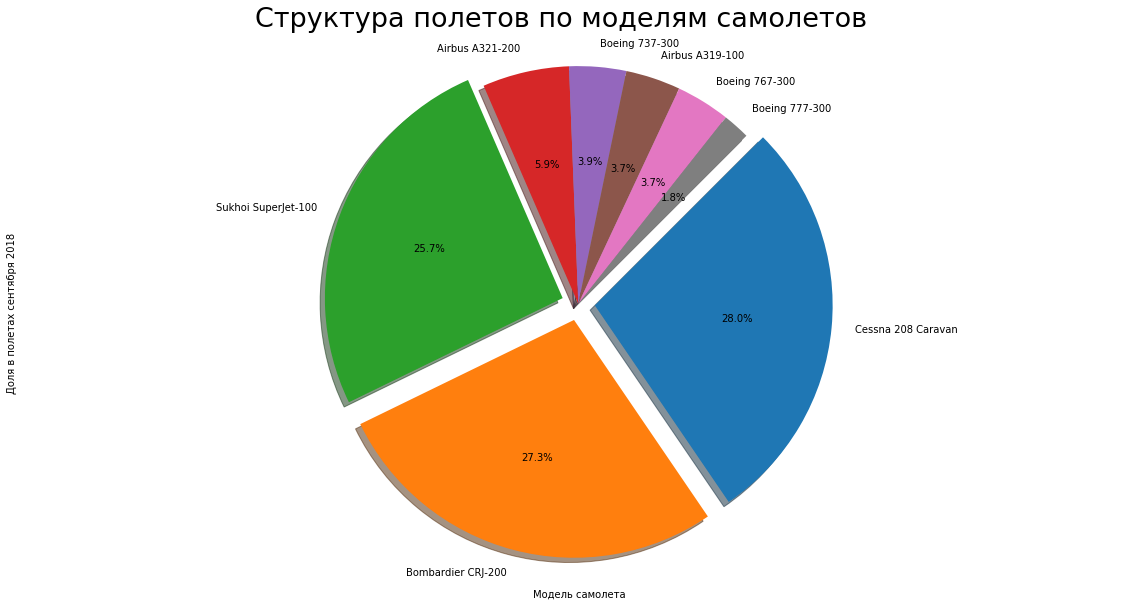

In [10]:
fig, axs = plt.subplots(figsize=(20, 10))
explode = [0.07, 0.07, 0.07, 0, 0, 0, 0, 0]
df_aircraft['flights_amount'].plot(
    kind='pie',
    explode=explode,
    startangle=45,
    labels = df_aircraft['model'].to_list(),
    #labeldistance = 1.1,
    autopct='%1.1f%%',
    shadow=True, 
    counterclock = False,
    #frame = True,
    #rotatelabels = True
)
axs.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel('Модель самолета')
plt.ylabel('Доля в полетах сентября 2018')
plt.figtext(.5,.9,'Структура полетов по моделям самолетов', fontsize=27, ha='center')
plt.show()

Построим рейтинг самолетов в зависимости от количества рейсов.

In [11]:
df_aircraft['ratio_flights'] = df_aircraft['flights_amount'] / df_aircraft['flights_amount'].sum()
display(df_aircraft.style.format({'ratio_flights':"{0:.2%}"}))

,model,flights_amount,ratio_flights
6,Cessna 208 Caravan,4557,27.98%
5,Bombardier CRJ-200,4446,27.30%
7,Sukhoi SuperJet-100,4185,25.70%
1,Airbus A321-200,960,5.89%
2,Boeing 737-300,630,3.87%
0,Airbus A319-100,607,3.73%
3,Boeing 767-300,600,3.68%
4,Boeing 777-300,300,1.84%


Тройка лидеров по количеству перелетов в сентябре 2018: Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100.  Интересно, что максимальное количество перелетов приходится на модель Cessna 208 Caravan, рассчитанную на перевозку 9 пассажиров. Такие самолеты востребованы для обслуживания местных линий, перевозки из областных центров в маленькие городки, туристических поездок.

В связи с неожиданным распределением  самолетов по количеству перелетов интересно посмотреть, изменится ли рейтинг самолетов по пассажирообороту. Расчет, разумеется, обладает некой условностью. Внесем в таблицу df_aircraft данные о вместимости самолетов и рассчитаем оборот.

In [12]:
df_aircraft['model'].to_list()

['Cessna 208 Caravan',
 'Bombardier CRJ-200',
 'Sukhoi SuperJet-100',
 'Airbus A321-200',
 'Boeing 737-300',
 'Airbus A319-100',
 'Boeing 767-300',
 'Boeing 777-300']

In [13]:
pass_amount = [9, 50, 95, 170, 450, 124, 210, 450]

In [14]:
df_aircraft['pass_amount'] = [9, 50, 95, 170, 450, 124, 210, 450] 
df_aircraft ['pass_traffic'] = df_aircraft['flights_amount'] * df_aircraft['pass_amount']
df_aircraft['ratio_traffic'] = df_aircraft['pass_traffic'] / df_aircraft['pass_traffic'].sum()
df_aircraft.sort_values(by = 'pass_traffic', ascending = False)

,model,flights_amount,ratio_flights,pass_amount,pass_traffic,ratio_traffic
7,Sukhoi SuperJet-100,4185,0.26,95,397575,0.28
2,Boeing 737-300,630,0.04,450,283500,0.20
5,Bombardier CRJ-200,4446,0.27,50,222300,0.15
1,Airbus A321-200,960,0.06,170,163200,0.11
4,Boeing 777-300,300,0.02,450,135000,0.09
3,Boeing 767-300,600,0.04,210,126000,0.09
0,Airbus A319-100,607,0.04,124,75268,0.05
6,Cessna 208 Caravan,4557,0.28,9,41013,0.03


Sukhoi SuperJet-100 и Bombardier CRJ-200 сохранили лидирующие позиции, а "малыш" Cessna 208 Caravan переместился в конец рейтинга.

#### Вывод

В структуре перелетов сентября 2018 года 81% перевозок осуществляется самолетами вместимостью до 100 человек -  Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100. Характерная ситуация для перевозок внутри страны. Это соответствует основному направлению компании F9.

### Города и количество рейсов

In [15]:
df_city = df_city.sort_values(by = 'average_flights')

In [16]:
df_city.describe()

,average_flights
count,101.00
mean,5.49
std,13.12
min,1.00
25%,2.00
50%,3.00
75%,5.87
max,129.77


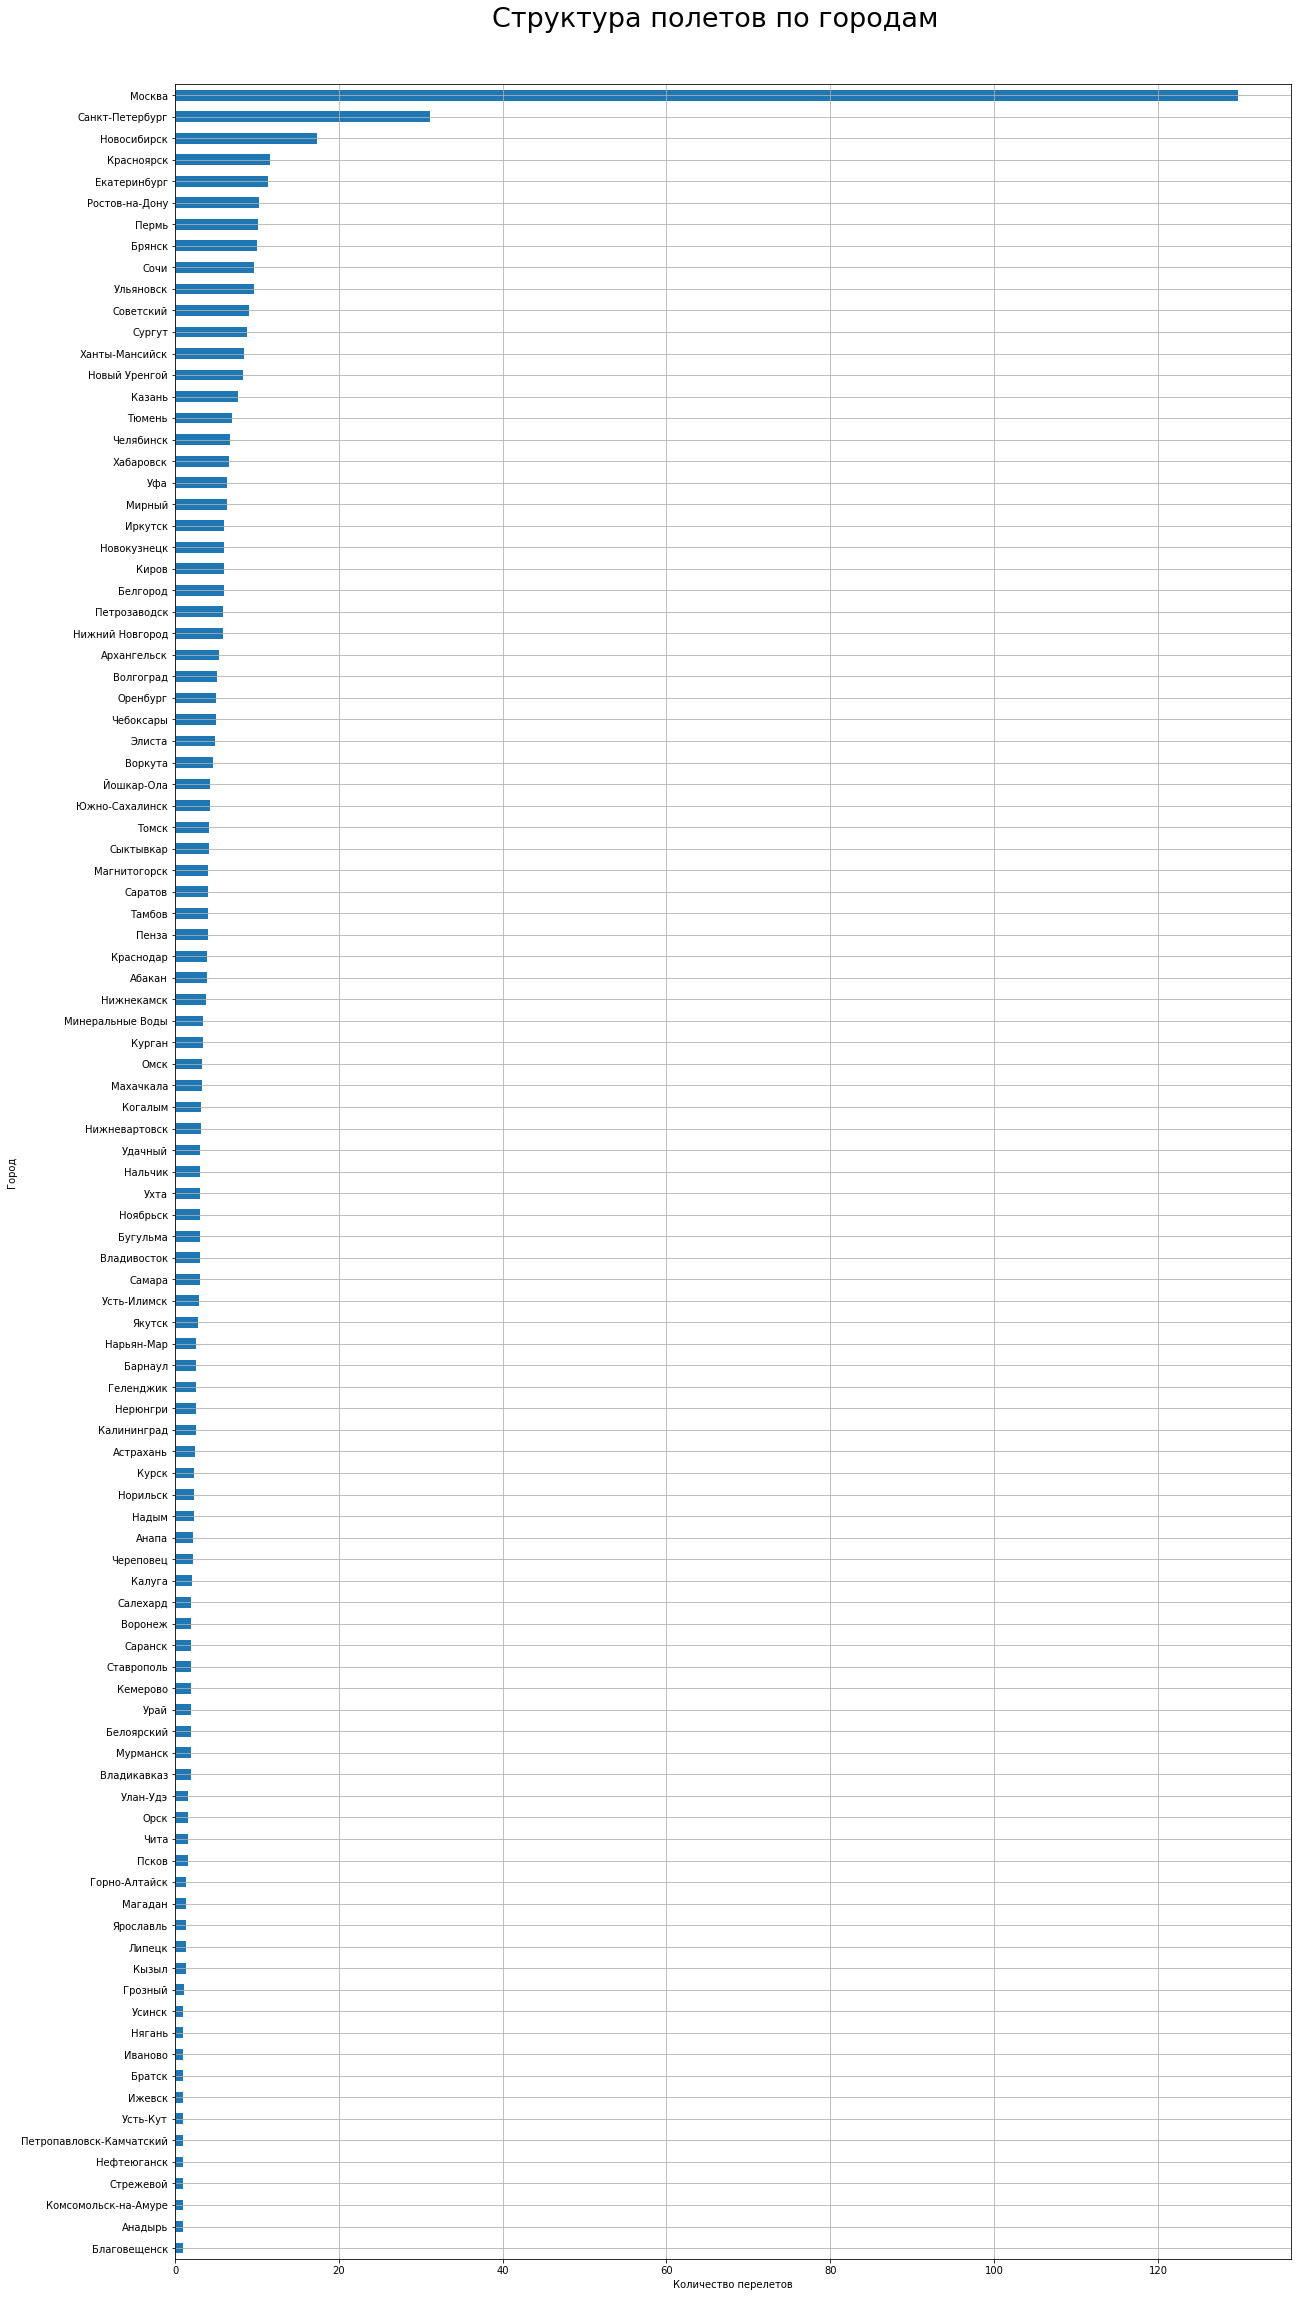

In [17]:
df_city.plot(
    x = 'city',
    kind = 'barh', 
    figsize = (20,40), 
    grid = True, 
    legend=False
)

plt.xlabel('Количество перелетов')
plt.ylabel('Город')
plt.figtext(.5,.9,'Структура полетов по городам', fontsize=27, ha='center')
#plt.xticks(rotation=45) #угол наклона подписей
plt.show()

Среднее количество перелетов в сутки в августе 2018 - около 6. Ожидаемый лидер по числу перелетов - это Москва - крупнейший город РФ с тремя аэропортами. Среднее количество перелетов в Москву - почти 130 рейсов в сутки.

### Топ-10 городов и количество рейсов

Определим топ-10 городов по количеству перелетов в августе 2018.

In [18]:
# Топ-10 городов по количеству перелетов
top_10 = df_city.sort_values(by = 'average_flights', ascending = False).head(10)
top_10['ratio'] = top_10['average_flights'] / top_10['average_flights'].sum()
display(top_10.style.format({'ratio':"{0:.2%}"}))

,city,average_flights,ratio
43,Москва,129.774,51.77%
70,Санкт-Петербург,31.1613,12.43%
54,Новосибирск,17.3226,6.91%
33,Красноярск,11.5806,4.62%
20,Екатеринбург,11.3226,4.52%
67,Ростов-на-Дону,10.1935,4.07%
63,Пермь,10.129,4.04%
10,Брянск,10,3.99%
74,Сочи,9.6129,3.83%
84,Ульяновск,9.58065,3.82%


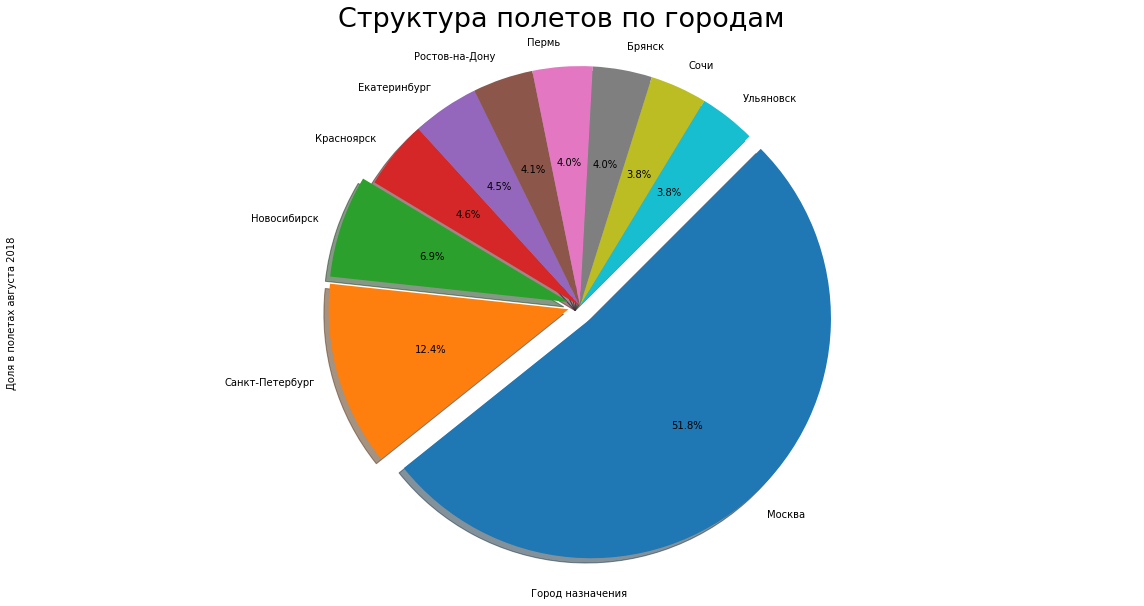

In [19]:
fig, axs = plt.subplots(figsize=(20, 10))
explode = [0.07, 0.05, 0.05, 0, 0, 0, 0, 0, 0, 0]
top_10['average_flights'].plot(
    kind='pie',
    explode=explode,
    startangle=45,
    labels = top_10['city'].to_list(),
    #labeldistance = 1.1,
    autopct='%1.1f%%',
    shadow=True, 
    counterclock = False,
    #frame = True,
    #rotatelabels = True
)
axs.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel('Город назначения')
plt.ylabel('Доля в полетах августа 2018')
plt.figtext(.5,.9,'Структура полетов по городам', fontsize=27, ha='center')
plt.show()

Свыше 50% перелетов осуществляется в Москву, 12,4% - в Санкт-Петербург, 6,9% - в Новосибирск. Москва и Санкт-Петербург - крупные центры бизнеса и туризма. Структура перелетов лишь подтверждает это.

## Общий вывод

В рамках данного исследования проанализированы выборка перелетов в августе 2018 в разрезе городов назначения и выборка среднего количества перелетов в сентябре 2018 в разрезе городов.  
Датасеты получены в результате работы с базой данных, предобработки не требуют.  

В структуре перелетов сентября 2018 года 81% перевозок осуществляется самолетами вместимостью до 100 человек - Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100. Характерная ситуация для перевозок внутри страны. Это соответствует основному направлению компании F9.  

Среднее количество перелетов в сутки в августе 2018 - около 6. Ожидаемый лидер по числу перелетов - это Москва - крупнейший город РФ с тремя аэропортами. Среднее количество перелетов в Москву - почти 130 рейсов в сутки - это 50% всех месячных перелетов самолетами F9.
В тройке лидеров по числу перелетов кроме Москвы - Санкт-Петербург (31 перелет или 12,4% общего количества перелетов) и Новосибирск (17 перелетов или 6,9% общего числа перелетов). 
